# 03. Functions
To make Python code more readable and reusable, we can factor it out into blocks of code, known as ***functions***. 

## Function `def`inition
The first line of a function is its definition, marked by the keyword `def`:

    def():
    """
    Docstring.
    """

A *docstring*, in triple quotes, describes what the function does. The body of a function is
indented one level. To call a function, give the name of the function followed
by a set of parentheses.

In [ ]:
def greet_user():
    """Display a simple greeting."""
    print("Hello!")

In [ ]:
??greet_user

In [ ]:
greet_user()

In [ ]:
print('I\'m a print function')

In [ ]:
# ??print

In [ ]:
def square(x):
    """
    Power X.
    """
    return x ** 2

In [ ]:
square(4)

In [ ]:
def square(x: float) -> float:
    """
    Squares the number.

    Arguments:
        x {float} -- a number

    Returns:
        float -- the square of the number
        
    Examples:
        >>> square(3)
        9
        >>> square(2.5)
        6.25
        >>> square(2.9)
        8.41
    """
    return x ** 2

In [ ]:
result = square(2.5)
result

In [ ]:
def name_age_hash(name='Povilas', age=25):
    """
    Takes name and age as parameters and returns
    a single integ er value representing their hash
    value
    """
    print(hash((name, age)))

In [ ]:
name_age_hash

In [ ]:
name_age_hash()

In [ ]:
name_age_hash('Jim', age=28)

In [ ]:
name_age_hash('Bob', age=71)

In [ ]:
# Note - hash() is not deterministic
from crypt import crypt

def name_age_hash(name: str, age: int, salt: str = 'Pepper') -> int:
    """
    Takes name and age as parameters and returns
    a single integer value representing their hash
    value.

    Keyword Arguments:
        name {str} -- the name of the person (default: {"Dovydas"})
        age {int} -- the age of the person (default: {29})

    Returns:
        int -- the hash of the person

    Examples:
        >>> name_age_hash('Dovydas', 29)
        'PeOwFsC3mXIiE'
        >>> name_age_hash('Geoffrey', 71)
        'PeZpp17pB2ang'
        >>> name_age_hash('Dovydas', age=30)
        'PeJ0lu1x6sT1o'
        >>> name_age_hash('Dovydas', 29, 'Vinted')
        'Vi5RSKuXo0qfw'
    """
    return crypt(f"{name}{age}", salt=salt)

In [ ]:
name_age_hash

In [ ]:
name_age_hash()

In [ ]:
name_age_hash('Jim', age=28)

In [ ]:
name_age_hash('Bob', age=71)

### `Exercise 1 - The Enumerate Clone`
Create a function named `enumerate2` which behaves like `enumerate`.

In [ ]:
l = ['Cat', 'Dog', 'Mouse']

In [ ]:
??enumerate

In [ ]:
enumerate(l)

In [ ]:
list(enumerate(l))

In [ ]:
from typing import Iterable

def enumerate2(iterable: Iterable) -> Iterable:
    """
    enumerate clone

    Arguments:
        iterable {Iterable} -- any iterable

    Returns:
        Iterable -- a result iterable
        
    Examples:
        >>> list(enumerate2([1, 2, 3]))
        [(0, 1), (1, 2), (2, 3)]
    """
    return zip(range(len(iterable)), iterable)

enumerate2(l)

In [ ]:
list(enumerate2(l))

In [ ]:
for data in [[1, 2, 3], 'some string', ('hi', 10, {1, 2})]:
    assert list(enumerate(data)) == list(enumerate2(data))

### `Exercise 2 - Generator of a Generator`
Create a function which takes a string as a parameter and returns a list and a generator inside another list, e.g.:

Input string:

    'Hi'

    [['H', 'i'], <generator object at ...>]

In [ ]:
def string_to_list_and_generator(s):
    return [list(s), (x for x in s)]

string_to_list_and_generator('Hi')

## Function Defaults

In [ ]:
from typing import List

def dangerous_defaults(n: int, data:list=[]) -> List[float]:
    for i in range(n):
        data.append(i)
    return data

In [ ]:
dangerous_defaults(5)

In [ ]:
dangerous_defaults(5)

In [ ]:
dangerous_defaults(5), dangerous_defaults(5)

### `Exercise 3 - Fixing Dangerous Defaults`
Fix the function above to avoid the described error.

In [ ]:
from typing import List, Union

def dangerous_defaults(n: int, data:list=None) -> List[float]:
    if data is None:
        data = []
    for i in range(n):
        data.append(i)
    return data
dangerous_defaults(5)

## Multi Output Functions
In Python, it is possible to return multiple outputs using a single function. 

**JK**, all functions have just a single output (but it may consist of multiple variables | values)

In [ ]:
number = 5
def multi_output_fun(number):
    
    return number/2, number**12, number*5

multi_output_fun(number)

In [ ]:
def multi_output_fun(data):
    keys, values = zip(*data)
    return keys, values

In [ ]:
multi_output_fun([('name', 'Jon'), ('house', 'Snow'), ('wolf', 'Ghost')])

### `Exercise 4 - Multi Average Fun(ction)`
Create a `moving_averages` function which takes a list of integers `list_of_ints` as input and returns 3 different moving averages for the input list elements. 
- Average  3 = mean(`i-1`, `i-1`, `i`) for each `i`.
- Average  7 = .....................................
- Average 15 = .....................................

`Hint` It may be helpful to firstly define a function that takes an integer list as input and returns a single moving average, and later call it three times using a more general parent function. E.g:

Input: 

    [41, 30, 25, 68] - List of integers 
    N = 3            - Window size for calculating the averages
    
Output:

    List of integers (the moving average for each of the list entries)

In [ ]:
def moving_average(list_of_integers, N):
    
    result=[]
    for idx, number in enumerate(list_of_integers):
        
        numbers = list_of_integers[:idx+1]
        moving_numbers = numbers[-N:]
        moving_mean = round(sum(moving_numbers)/(len(moving_numbers)), 4)
        result.append(moving_mean)
    
    return result

In [ ]:
l = [10, 15, 30, 40]
l

In [ ]:
moving_average(l, 3)

In [ ]:
moving_average(l, 7)

In [ ]:
moving_average(l, 15)

In [ ]:
def multi_moving_averages(list_of_integers):
    
    moving_3 = moving_average(l, 3)
    moving_7 = moving_average(l, 7)
    moving_15 = moving_average(l, 15)
    return moving_3, moving_7, moving_15

multi_moving_averages(l)

## Built-in functions
Some of the built-ins that I found to be the most useful (for the full list, check [this link](https://docs.python.org/3/library/functions.html)):

In [ ]:
# print
print(123)

In [ ]:
# list
list('123'), list({1, 2, 3}), list({1: 'a', 2: 'b', 3: 'c'})

In [ ]:
# range
list(map(list, (range(4), range(-10, 2), range(20, 10, -3))))

In [ ]:
# zip
zip()

In [ ]:
# abs
abs(-100), abs(100), abs(10.5), abs(-0.5)

In [ ]:
# bool
bool(1), bool('123'), bool(''), bool(False), bool([]), bool({'key': 'value'})

In [ ]:
# all 
# False values: 0, False, None, '', [], set(), {}, ()
all([-1, -2, -3])

In [ ]:
# all
all([10, '1', True]), all([10, '1', True, False])

In [ ]:
# any
any([10, '1', True]), any([10, '0', True, 1]), any([0, '', False, {}])

In [ ]:
# any
any([0, False, None, '', [], set(), {}, ()]), any([0, False, None, '', [], set(), {}, (), 1])

In [ ]:
# chr
chr(97), chr(122), chr(65), chr(90)

In [ ]:
ord('a'), ord('z'), ord('A'), ord('Z')

In [ ]:
# dict
dict([(0, 'a'), (1, 'b'), (2, 'c')])

In [ ]:
# dir
dir(list)

In [ ]:
# enumerate
enumerate('abcd'), list(enumerate('abc'))

In [ ]:
# filter
list(filter(lambda x: x > 2, [1, 2, 3, 4, 5]))

In [ ]:
# float
float('11'), float(99)

In [ ]:
# help
help(dir)

In [ ]:
# input
secret_key = input('What is the secret key?')

In [ ]:
# int
int('100'), int(10.5), int(True)

In [ ]:
# iter & next
iterator1 = iter([1, 2, 3])
next(iterator1), next(iterator1), next(iterator1)

In [ ]:
# len
len('A man a plan, Panama'), len([6, 6, 6]), len(set([6, 6, 6]))

In [ ]:
# map
list(map(int, list('123')))

In [ ]:
# max & min
max([0, 1, 2, 3, 9, -100]), min([0, 1, 2, 3, 9, -100])

In [ ]:
# reversed
list(reversed('dcba'))

In [ ]:
# set
set([1, 2, 1, 2, 3, 5, 5])

In [ ]:
# sorted
sorted([1, 9, 8, 7])

In [ ]:
# str
str(123), str([1, 2, 3])

In [ ]:
# sum
sum([100, 10, 1])

In [ ]:
# tuple
tuple([1, 2, 3])

In [ ]:
# type
type(1), type('1'), type(True)

### `Exercise 5 - Modularize`
Rewrite all of your developed scripts from `Exercises` in `02_Control_Flow_and_Comprehensions.ipynb` as Python functions to create your first Python **module**. Essentially, a module is a `.py` file, containing a bunch of Python definitions and statements that you can access using the `import` statement. E.g., `import utils.py` imports all of the definitions to the current session and they can be accessed using their respective names.

### `Exercise 6 - Fibonacci`
Write a Python function to get the Fibonacci series up to some certain number (n). 

**N.B.** The Fibonacci Sequence is a series of numbers, where every following number is defined by the sum of the two previous numbers: 

    0, 1, 1, 2, 3, 5....
    
Input:

    fibonacci(10)
    
Output:
    
    [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [ ]:
def fibonacci(n):
    result = []
    a, b = 0, 1
    while len(result) < n:
        (a, b) = [b, a + b]
        result.append(a)
    return result

fibonacci(10)

### `Exercise 7 - Upper/Lower`
Write a Python function that accepts a string and calculates the number of upper case letters and lower case letters it has. E.g.:

    Input   :  The quick Brown Fox
    N Upper :  3
    N Lower :  13


In [ ]:
def string_test(s):
    d={
        "UPPER_CASE":0,  
        "LOWER_CASE":0
    }
    for c in s:
        if c.isupper():
            d["UPPER_CASE"]+=1
        elif c.islower():
            d["LOWER_CASE"]+=1
        else:
            pass
    print ("Input   : ", s)
    print ("N Upper : ", d["UPPER_CASE"])
    print ("N Lower : ", d["LOWER_CASE"])

string_test('The quick Brown Fox')

### `Exercise 8 - The Mover`
Write a Python function that returns no output bus moves files from one directory to another. Bring a dummy folder with some files to the present working directory to play around (nothing important, for your own good:)).
    
Inputs:

    input_path (string)       - the directory containing the files that have to be movied/copied.
    output_path (string)      - the directory to which the files have to be moved.
    copy (boolean)            - if `True` (default), keep the original directory intact (otherwise delete it).
    
Check Python built-in libraries `glob`, `os`, and `shutil` to complete the task:

**N.B.** Don't forget that you will have to create the output path before moving the files, possibly recursively if you directory is nested.

In [ ]:
import os
from glob import glob
import shutil

In [ ]:
pwd = os.getcwd()
pwd

In [ ]:
os.listdir()

In [ ]:
glob(f'{pwd}/data/*/*')

In [ ]:
# Let's say we want to duplicate the Trump corpus files
chosen_dir = f'{pwd}/data/clinton_trump_corpus/Trump'
target_dir = f'{pwd}/data/clinton_trump_corpus/Trump_copy'

# These seem to be all the files that will have to be moved
glob(f'{chosen_dir}/*')

In [ ]:
def mover(inp_path, out_path, copy=True):
    
    if not os.path.exists(inp_path):
        print (f'The path `{inp_path}` does not exist! Please provide a valid input path.')
        return
    
    if not os.path.exists(out_path):
        print (f'The path `{out_path}` does not exist! Creating...')
        os.mkdir(out_path)
    
    fns = glob(f'{inp_path}/*')
    for fn in fns:

        fn_end = fn.split('/')[-1]
        new_fn = out_path + '/' + fn_end
        
        shutil.copy(fn, new_fn)
        if not copy:
            os.remove(fn)
        
mover(chosen_dir, target_dir)

### `Exercise 9 - Reader`
Write a Python function `def reader(....)` that reads the contents of a of `.txt` file (use one of the speeches within the `data/clinton_trump_corpus`.
   
Input:

    input_path (string)       - the path to the `.txt` file that will be read.
    
Output

    lines                     - a list of lines (strings) from the `.txt` file.

In [ ]:
def reader(in_fn):
    with open(in_fn, 'r') as inputfile:
        lines = inputfile.readlines()
    return lines

reader(f'{chosen_dir}/Trump_2016-09-12-A.txt')

### `Exercise 10 - Multi-Reader`
Write a Python function `def multi_reader(...)` that uses **The Reader** in order to get the contents of all text `.txt` files within a directory.
   
Input:

    input_path (string)       - the path to the directory containing a bunch of .txt files. 
        
Output

    documents                 - a list of line-lists (for each of the corresponding .txt files).

In [ ]:
def multi_reader(folder_path):
    
    result=[]
    for fn in glob(chosen_dir+'/*'):
        lines = reader(fn)
        result.append(lines)
    return result

multi_reader(chosen_dir)

In [ ]:
def reader(in_fn): 
    return open(in_fn, 'r').readlines()

def multi_reader(folder_path): 
    return [reader(fn) for fn in glob(chosen_dir+'/*')]

### `Exercise 11 - Stats-Reader`
Write a Python function `def stats_reader(...)` that uses **Multi Reader** to get the contents of multiple text files (e.g., a corpus of documents for a single person), and returns a variety of stats about them:

Input:

    documents         - a list of line-lists (for each of the corresponding .txt files).
    
Output

    word_count        - total amount of words in all of the documents.
    vocab_size        - total amount of unique words in all of the documebts.
    mean_word_count   - average amount of words per document.
    n_lines           - average amount of lines per document.
    top_words         - top 50 most common words.

In [ ]:
def flatten(input_list): 
    return [item for inner_list in input_list for item in inner_list]

In [ ]:
def stats_reader(folder_path):
    
    # A list of all documents (single document - list of lines)
    documents = multi_reader(folder_path)
    
    # A list of all lines
    lines = flatten(documents)
    
    # NOTE: STRING CLEANUP PROCEDURES COULD BE INSERTED HERE (before token splitting), e.g.:
    # -- remove audience reaction remarks <> if you want to work with the text content.
    # -- lowercase the text to avoid duplicates when getting the token counts
    # -- filter punctuation (replace to whitespaces, then remove duplicated whitespaces, remove newlines and tabs)
    
    # NOTE 2: FUNCTIONS USEFUL FOR ALL (CAN MOVE TO MODULES | LESS MESS)
    # You will often want to have both the full and the cleaned versions of the text,
    # since the former can be used for vizualizations of output (full content), whereas
    # the latter is much more useful for getting some relevant stats for vizualization/modeling purposes
    
    # A list of split (by whitespace) lines 
    lines_split = [line.split() for line in lines]
    
    # A list of all words
    all_words = flatten(lines_split)
    
    # NOTE: after STRING CLEANUP you could remove english stopwords
    # Define a set of words and then use list comprehension over chosen list of words
    # FUNCTION USEFUL

    # Word count statistics
    word_count = len(all_words)
    vocab_size = len(set(all_words))
    mean_word_count = len(all_words)/len(documents)
    
    # Line count statistics
    n_lines = len(lines)
    n_words_per_line = [len(words) for words in lines_split]
    s = 0
    for l in n_words_per_line:
        s+=l
    n_words_per_line = s/n_lines
    
    print(f"Total words count {word_count}")
    print(f"Unique words count {vocab_size}")
    print(f"Words per document {round(mean_word_count,3)}")    
    print(f"N lines: {n_lines}")
    print(f"Words per line {round(n_words_per_line,0)}")
    
    d = dict()
    for word in all_words:
        if word not in d:
            d[word]=1
        else:
            d[word]+=1
    top50 = list({key:value for key, value in sorted(d.items(), key=lambda item: item[1], reverse=True)}.items())[:50]
    print(f"Top 50 words:")
    return top50

stats_reader(target_dir)

In [ ]:
# DEVELOP FUNCTION(ALITY) (e.g., hillary vs all text):
# should return the proportion of some specific word within a corpus of text
# def proportional_count(word, all_words):
#     return

# DEVELOP EXTENSION - BIGRAMS:
# Use functions built previously to also return the most common bigrams
# Might be costly, so use a boolean argument with default False for this one (dont run if not called)

# DEVELOP USECASE - RETURNS:
# Change the function returns so that you can store the most relevant output from some specific source
# to a variable

# DEVELOP FUNCTIONALITY - APPLAUSE EFFECT REACTION
# This one's harder and with a much larger scope in general, so clearly define what you want it to do
# This should be a function outside of the main stats reader, possibly calling its outputs.
# The input might be some specific audience reaction, and the output could be the lines that included them

In [ ]:
# DEVELOP:
# 1. Input line_list, can be combined with readers
# 2. Search for any word|string in a given list, use substring method

def look_for_words(search_for1, search_for2, nr_word, input_file_path):
    
    word_count_total = 0
    word_count = 0
    
    # Read the input file
    with open(input_file_path, 'r') as inputfile:
        line = inputfile.read().split()
        i = 0
    
    for word in line:
        i = i + 1
    print(f"Inthe text there is {i} words")
    word_count = i
    
    # Searchin for search_for1 and search_for2 list combination of words
    for word1 in search_for1:
        for word2 in search_for2:
            i = -1
            for t in line:
                i = i + 1
                if (i + nr_word + 1 < len(line)) and (line[i].upper() == word1.upper()) and (line[i + 1].upper() == word2.upper()):
                    for spausdinti in range(nr_word):
                        print(f"{line[i + spausdinti]}", end=" ")
                    print(f"_ _ _ _ _ _ _ _ _ _ _ _  (Searching for {word1} {word2}: )")
                    word_count_total = word_count_total + word_count
    print(f"It was scaned {word_count_total} word in directory")


In [ ]:
# Searching for nr_word 
nr_word = 5
search_for1 = ["I", "We","because"]
search_for2 = ["need", "of", "will"]
input_path = glob(f'{chosen_dir}/*')

for failas in input_path:
    filtras(search_for1, search_for2, nr_word, failas)
    print('-------------')
    print(failas)
    print('-------------')


Now use the stats reader to compare the presidential Donald Trumph's and Hilary Clinton's speeches, think about answering these questions:

    What did you observe?
    What could this mean?
    Are there any technical flaws? What could be done better?
    What further analysis might be useful in providing more information about the candidates?

Discuss these questions in groups, compare your `stats_reader` implementations, and outline a plan for improving your analysis, including any code changes that may be necessary (think simple this time, let's stick to basic Python, not some fancy NLP libraries). Collect your notes here (double click on the cell to edit):

1. 
2. 
...

Now actually improve the design of the `stats_reader` and review the new results. Share your thought process and findings with your colleagues.

## Extended Iterable Unpacking
### The Star `*` Operator
    The `*` operator in Python let's you to contain an arbitrary number of arguments within one paremeter.

In [ ]:
glob(pwd)

In [ ]:
glob('*')

In [ ]:
glob('RE*')

In [ ]:
ai_list = list('AI')
ai_list

In [ ]:
first_letter, second_letter = ai_list
first_letter, second_letter

In [ ]:
first_letter = ai_list[0]
second_letter = ai_list[1]
first_letter, second_letter

In [ ]:
ai_word_list = ['Anyone', 'can', 'learn', 'AI']

In [ ]:
first_word, *other_words = ai_word_list
first_word, other_words

In [ ]:
first_word, *middle_words, last_word = ai_word_list
first_word, middle_words, last_word

## Function arguments - the `*` operator
- Python let's you to contain an arbitrary number of arguments within one paremeter using the `*` operator
- The `**` operator allows a parameter to collect an arbitrary number of keyword arguments
- A parameter that accepts an arbitrary number of arguments must come last in the function definition

In [ ]:
sum(1, 2, 3)

In [ ]:
??sum

From the docstring: `sum(iterable, start=0, /)`

    `sum` takes just two arguments - an iterable and a starting point.

In [ ]:
sum([1,2,3], 0)

In [ ]:
sum((1,2,3), 5)

Let's make a `sum2` function, which takes as many parameters as needed:

In [ ]:
def sum2(*args):
    return sum(args)

In [ ]:
sum2(1, 2, 3, 4)

The problem now is that we can't add a starting point as a param anymore. Let's fix it:

In [ ]:
def sum2(*args, start=0):
    return sum(args, start)

In [ ]:
sum2(1, 2, 3, 4, start=100)

***Collecting an arbitrary number of arguments:***

In [ ]:
def make_pizza(size, *toppings):
    """Make a pizza."""
    print("\nMaking a " + size + " pizza.")
    print("Toppings:")
    for topping in toppings:
        print("- " + topping)

In [ ]:
make_pizza('small', 'pepperoni')

In [ ]:
make_pizza('large', 'bacon bits', 'pineapple')

In [ ]:
make_pizza('medium', 'mushrooms', 'peppers', 'onions', 'extra cheese')

***Collecting an arbitrary number of keyword arguments:***

In [ ]:
def build_profile(first, last, **user_info):
    """Build a user's profile dictionary."""
    
    # Build a dict with the required keys.
    profile = {'first': first, 'last': last}
    
    # Add any other keys and values.
    for key, value in user_info.items():
        profile[key] = value
        
    return profile

In [ ]:
# Create two users with different kinds of information.
user_0 = build_profile('albert', 'einstein', location='princeton')
user_0

In [ ]:
user_1 = build_profile('marie', 'curie', location='paris', field='chemistry')
user_1

***Collecting an arbitrary number of arguments | keyword arguments:***

In [ ]:
def outer(fn, *args, **kwargs):
    return fn(*args, **kwargs)

In [ ]:
outer(print, 100, 200, 300, sep=' + ')

In [ ]:
outer(print, 100, 200, 300, sep=' + ', end='\t')
outer(print, 100, 200, 300, sep=' + ', end='\t')

In [ ]:
def catch_all(*args, **kwargs):
    
    name='exp1'
    
    for arg in args:
        name+='_arg'
        
    for key, value in kwargs.items():
        name+=f'_{key}{value}'
        
    print (name)
    
    print(args)
    print(kwargs)
    
catch_all(1, 2, 3, test=True, is_valid=False)

In [ ]:
catch_all(1, 2, 3, **{'test': True, 'is_valid': False})

### `Exercise 12`
Create a `build_student_profile` function that takes as input:
- Students name and surname.
- An arbitrary number of middle names.
- An arbitrary number of arguments representing students phone, address, etc.

The function should return user profile dictionary as given in the example above, but the middle names should be stored together as a single string (separated by whitespaces).

# Recursive Functions
Formally, a recursive function is a function defined in terms of itself via self-referential expressions. That is, such function will repeat its behaviour until some condition is met to return a result.

    A good real world example of recursion could be the mirror effect. If we place another mirror in front of the first one, the objects get reflected recursively. Yes, the movie Inception is another nice example of recursion. Equivalently dizzy.

All functions of such kind share a common structure made up of two parts: the base case and the recursive case. To demonstrate this stucture, let's try creating a recursive function that calculates the factorial `n!` of a number:
    
    
    n! = n x (n−1) x (n−2) x (n−3) ⋅⋅⋅⋅ x 3 x 2 x 1
    
This can be deconstructed into smaller pieces by calling the factorial function itself (recursively): 

    n! = n x (n−1)! 
    n! = n x (n−1) x (n−2)!
    n! = n x (n−1) x (n−2) x (n−3)!
    ...
    ...
    n! = n x (n−1) x (n−2) x (n−3) ⋅⋅⋅⋅ x 3!
    n! = n x (n−1) x (n−2) x (n−3) ⋅⋅⋅⋅ x 3 x 2!
    n! = n x (n−1) x (n−2) x (n−3) ⋅⋅⋅⋅ x 3 x 2 x 1!
    
Here, `1!` is our base case, and it equals 1. 

In [ ]:
def factorial_recursive(n):
    
    # Base case: 1! = 1
    if n == 1:
        return 1

    # Recursive case: n! = n * (n-1)!
    else:
        return n * factorial_recursive(n-1)
    
factorial_recursive(4)

When we call this function with a positive integer, it will recursively call itself by decreasing the number:

    factorial_recursive(4)              # 1st call with 4
    4 * factorial_recursive(3)          # 2nd call with 3
    4 * 3 * factorial_recursive(2)      # 3rd call with 2
    4 * 3 * 2 * factorial_recursive(1)  # 4th call with 1
    4 * 3 * 2 * 1                  # return from 4th call as number=1
    4 * 3 * 2                      # return from 3rd call
    4 * 6                          # return from 2nd call
    24                             # return from 1st call

This recursion ends when the number reaches the base condition. If this condition is not met, the function call itself infinitely.

### Maintaining the State
When dealing with recursive functions, it may be hard to keep the track of its progress and debug any potential issues, so you should try to maintain their state:
- ***Thread the state*** through each recursive call so that the current state is a part of the current call's execution context.
- Keep the state in ***global scope*** (global variable instead of an instance one).

Here's an example of the first approach:

In [ ]:
def sum_recursive(current_number, accumulated_sum):
    
    # Base case
    # Return the final state
    if current_number == 11:
        return accumulated_sum

    # Recursive case
    # Thread the state through the recursive call
    else:
        return sum_recursive(current_number + 1, accumulated_sum + current_number)

In [ ]:
sum_recursive(1, 0)

In [ ]:
#print

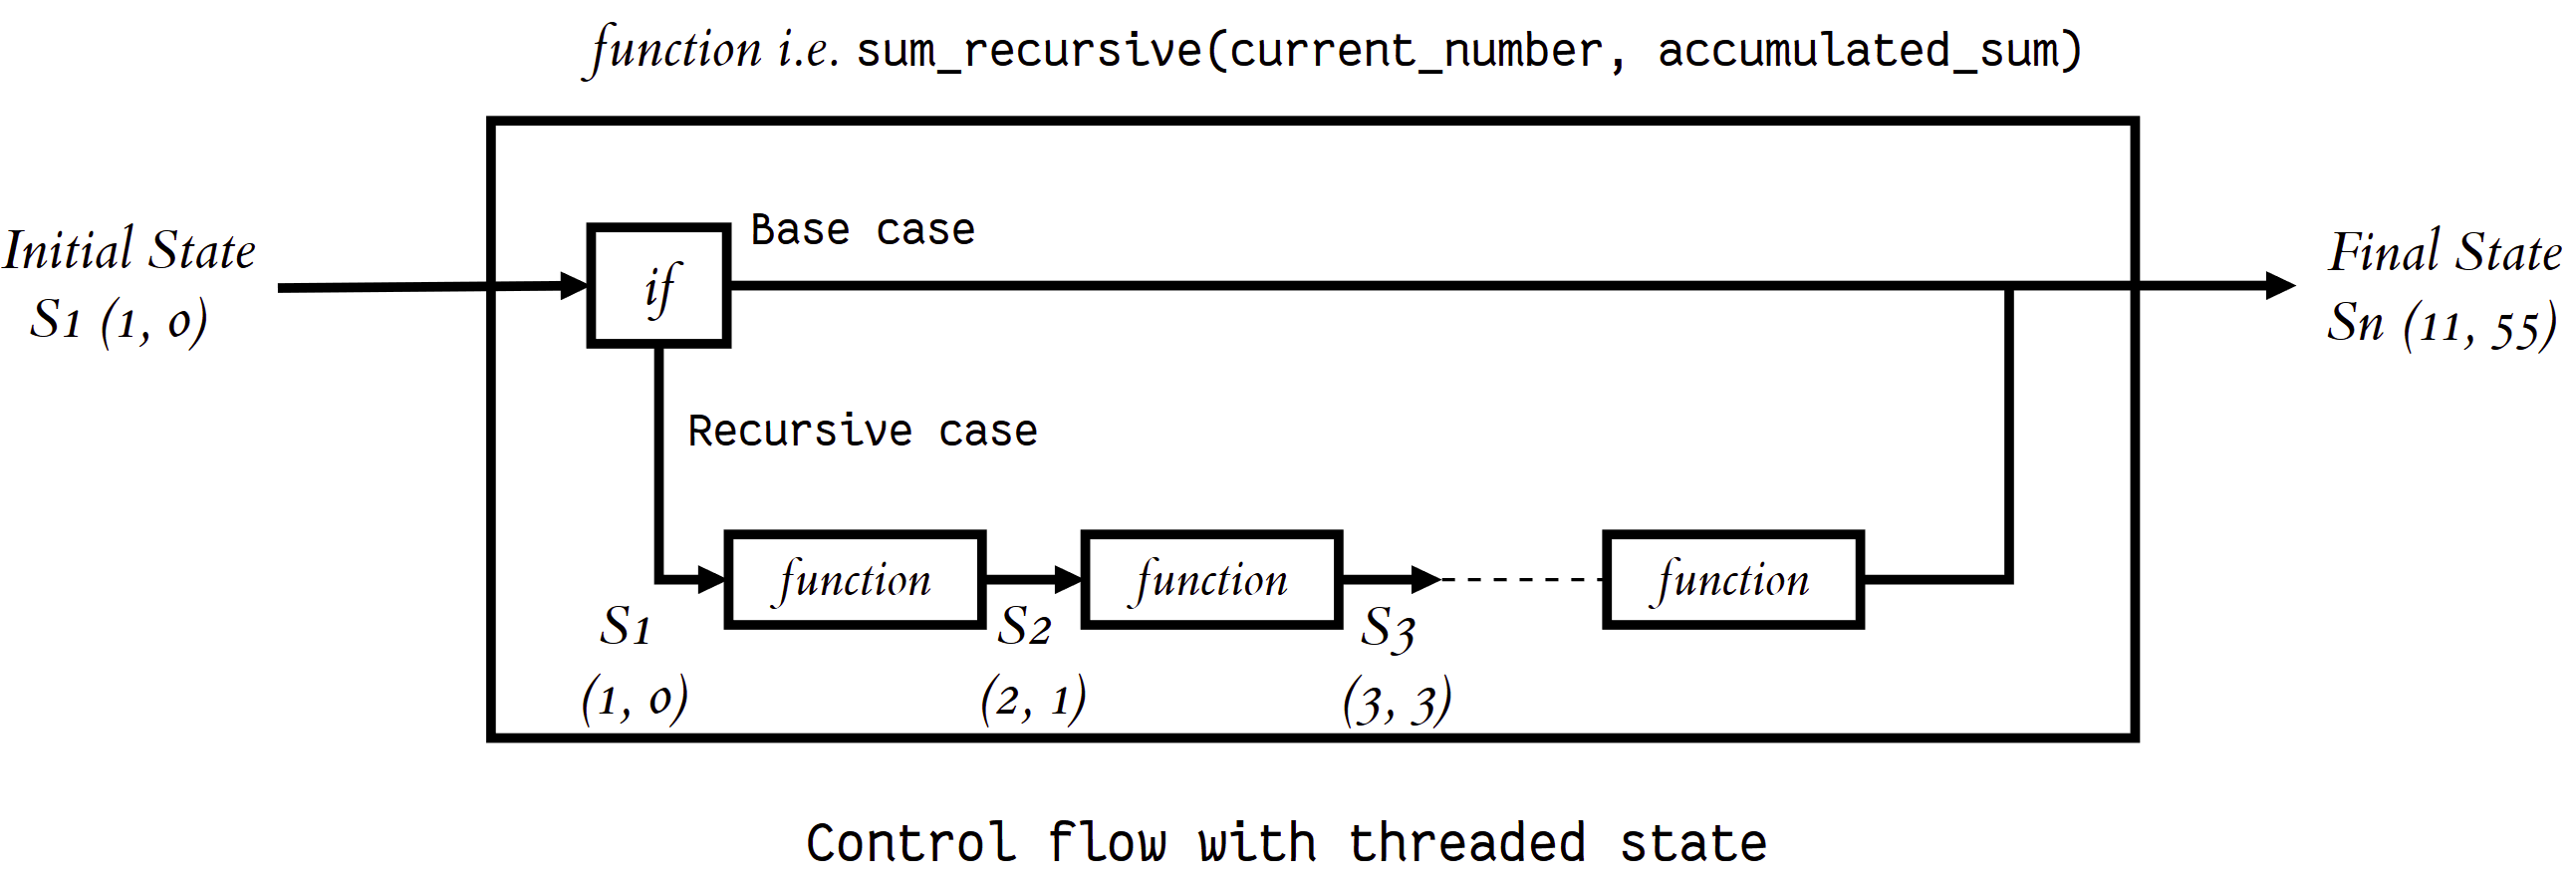

Image adopted from this [link](https://realpython.com/python-thinking-recursively/). You may want to look through it for more information about recursion in Python.

Here's the second example - keeping the states within the ***global scope***:

In [ ]:
# Global mutable state
current_number = 1
accumulated_sum = 0

def sum_recursive():
    
    global current_number
    global accumulated_sum
    
    # Base case
    if current_number == 11:
        return accumulated_sum
    
    # Recursive case
    else:
        accumulated_sum = accumulated_sum + current_number
        current_number = current_number + 1
        return sum_recursive()

In [ ]:
sum_recursive()

However, global variables are considered to be a bad practice in programming (not only Python), so you should avoid this approach whenever possible.

**N.B.** Global constants are not conceptually the same as global variables; global constants are perfectly harmless. In Python, the distinction between the two is purely by convention: CONSTANTS_ARE_CAPITALIZED and globals_are_not.

    The global variables are bad is that they enable functions to have hidden (non-obvious, surprising, hard to detect, hard to diagnose) side effects, leading to an increase in code complexity.

However, sane use of global state is acceptable (as is local state and mutability) even in functional programming, either for algorithm optimization, reduced complexity, caching and memoization, or the practicality of porting structures originating in a predominantly imperative codebase.

For more information about the global variable problems, check these links: [1](http://c2.com/cgi/wiki?GlobalVariablesAreBad) and [2](https://softwareengineering.stackexchange.com/questions/148108/why-is-global-state-so-evil)

### Recursive Fibonacci

Here's an additional example of a recursive function for calculating the Fibonacci numbers:

In [ ]:
def fibonacci_recursive(n):
    print("Calculating F", "(", n, ")", sep="", end=", ")

    # Base case
    if n == 0:
        return 0
    elif n == 1:
        return 1

    # Recursive case
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

In [ ]:
fibonacci_recursive(5)

As you can see from the output above, we are unnecessarily recomputing values. Let’s try to improve fibonacci_recursive by caching the results of each Fibonacci computation:

In [ ]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fibonacci_recursive(n):
    print("Calculating F", "(", n, ")", sep="", end=", ")

    # Base case
    if n == 0:
        return 0
    elif n == 1:
        return 1

    # Recursive case
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)


`lru_cache` is a decorator that caches the results. Thus, we avoid recomputation by explicitly checking for the value before trying to compute it. One thing to keep in mind about `lru_cache` is that since it uses a dictionary to cache results, the positional and keyword arguments (which serve as keys in that dictionary) to the function must be hashable.

### `Exercise 13`
Write a Fibonacci number calculator using recursion.


### Why Recursion?

***Pros***
1. Recursive functions make the code look clean and elegant
2. A complex task can be broken down into simpler sub-problems using recursion.
2. Sequence generation is easier with recursion than using some nested iteration

***Cons***
1. Sometimes the logic behind recursion is hard to follow through.
2. Recursive calls are expensive (inefficient) as they take up a lot of memory and time.
3. Recursive functions are hard to debug.

## What is the best way to structure a function?
As you have observed previously, there are multiple ways to write and call a function. When you are starting out, try to simply ***make it work, later polish it to be reliable and efficient***. After you develop an understanding of the more subtle advantages of the different structures | syntax, just ***explore and time it***.

## Autotiming with Jupyter
For automatic timing on Jupyter Notebook cells, go to your anaconda prompt, activate the working environment, and run (in terminal): 

    pip install ipython-autotime
    
Then add this line at the top of the notebook near the imports and run the cell:
    
    %load_ext autotime